<center><font color="blue"><strong>Assignment 4 - Twitter Sentiment Classification using Apache Spark<br>
By SAISRIKANTH RATHAKRISHNAN (sratha2@uic.edu)</strong></font> </center>





<pre>

1. TWEET PROCESSING STEPS:
    The tweets are extracted to a list called train. This list is processed to clean the data.
    The tweets had @username and URLs present in it. 
    The usernames are replaced with AT_USER 
    The links are replaced with URL
    We are then sending the words through Porter stemmer and we are cleaning the words
    Then some words with numbers are processed and numbers are removed from those words
    Stopwords are also removed
    The temp_test has the cleaned texts of the tweets
    
2. Feature Space: The words in the tweets in the entire data set
    Used Unigrams
    The size of the feature space has all the distinct words in the data set
    
3. Varying the numFeatures in Decision tree so that it could be trained fast.
</pre>
<pre>4.    </pre>

<table border="1">
<tr>
<th></th>
<th>NB</th>
<th>LR</th>
<th>DT</th>
</tr>
<tr>
<td>training accuracy</td>
<td>.8421</td>
<td>.880</td>
<td>.5954</td>
</tr>
<tr>
<td>test accuracy</td>
<td>.7604</td>
<td>.727</td>
<td>.5738</td>
</tr>
<tr>
<td>10-fold cross-validation</td>
<td>.60</td>
<td>.651</td>
<td>.5954</td>
</tr>
<tr>
<td>avg precision</td>
<td>.76</td>
<td>.727</td>
<td>.5905</td>
</tr>
<tr>
<td>confusion Matrix</td>
<td>[[ 132.   45.]
 [  41.  141.]]</td>
<td>[[ 116.   61.]
 [  37.  145.]]</td>
<td>[[ 137.  107.]
 [  40.   75.]]</td>
</tr>
</table>

 <pre>  
5. For Logistic Regression, overfit happens


6.precision : It is a value with a combination of True positives divided by total outcomes in positive(True,False)
recall: It is a value with a combination of True positives divided by total outcomes in True Pos and False Neg
f1-score : A balance value between Precision and Recall
confusion matrix: Gives values of true positive, true negative, false positive, false negative

7.  

8.

9. Naive Bayes performs the best since it has a good accuracy value with the test data

10.
</pre>

In [170]:
!pip install nltk

In [5]:
import nltk

hello


<pre>!pip install nltk
1. install nltk and 
2. we are importing the nltk</pre>

In [4]:
import pyspark
sc = pyspark.SparkContext('local[*]')

<pre>Importing pyspark here..
</pre>

In [5]:

train=sc.textFile("train.csv").map(lambda line: line.split(",")[5]).collect()
train1=sc.textFile("train.csv").map(lambda line: line.split(",")[0]).collect()

testing=sc.textFile("test.csv").map(lambda line: line.split(",")[5]).collect()
testing1=sc.textFile("test.csv").map(lambda line: line.split(",")[0]).collect()

<p>train contains the tweets from train.csv file. We are extracting the 6th column that contains the tweets by the users.</p>
<br>
<p>train1 contains the polarity value from train.csv file. We are 1st column of that file which has the polarity of the tweets.</p>
<br>

<p>testing contains the tweets from test.csv file. We are extracting the 6th column that contains the tweets by the users.</p>
<br>
<p>testing1 contains the polarity value from test.csv file. We are 1st column of that file which has the polarity of the tweets.</p>
<br>

<p>train, train1 will be used for training the model.</p>
<br>
<p>testing, testing1 will be used for testing.</p>
<br>


'"@switchfoot http://twitpic.com/2y1zl - Awww'

In [7]:

polarity_list=[]
for i in train1:
    i=i.strip("\"")
    polarity_list.append(i)
    

polarity_list_test=[]
for i in testing1:
    i=i.strip("\"")
    polarity_list_test.append(i)

<p>Creating a polarity list with their values cleaned. The datasets had 0's and 1's inside quotes and I have processed it to remove it.</p>


In [8]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

a=[]
temp_test=[]



stop_words=open("stopwords.txt","r")
stopList=[]
for i in stop_words:
    stopList.append(i.strip())
#print (stopList)


for i in range(len(train)):
    a=train[i]
    
    b=[]
    temp=[]
    a=a.split(" ")
  
    for i in a:
        i=i.strip(".")
        i=i.strip("-")
        i=i.strip(":")
        i=i.strip("!")
        i=i.strip("\'")
        i=i.lower()
        i=(ps.stem(i))
        i=''.join([k for k in i if not k.isdigit()])
        if "@" in i:
            temp.append("AT_USER")
        elif "http" in i:
            temp.append("URL")
        elif "\"" in i:
            if i[(i.index("\""))+1:len(i)] not in stopList:
                temp.append(i[(i.index("\""))+1:len(i)])
            
        else:
            if i not in stopList:
                temp.append(i)
    
    
    temp_test.append(temp)
    
#print (temp_test[3])


a_test=[]
temp_test_test=[]
for i in range(len(testing)):
    a=testing[i]
    
    b=[]
    temp=[]
    a=a.split(" ")
  
    for i in a:
        i=i.strip(".")
        i=i.strip("-")
        i=i.strip(":")
        i=i.strip("!")
        i=i.strip("\'")
        i=i.lower()
        i=(ps.stem(i))
        i=''.join([k for k in i if not k.isdigit()])
        if "@" in i:
            temp.append("AT_USER")
        elif "http" in i:
            temp.append("URL")
        elif "\"" in i:
            if i[(i.index("\""))+1:len(i)] not in stopList:
                temp.append(i[(i.index("\""))+1:len(i)])
            
        else:
            if i not in stopList:
                temp.append(i)
    
    
    temp_test_test.append(temp)
    
#print (temp_test_test[3])

['AT_USER', 'miss', 'ps']
['AT_USER', "you'll", 'love', 'kindle', "i'v", 'mine', 'month', 'never', 'look', 'back', 'new', 'big', 'one', 'huge', 'need', 'remors', '']


<pre>Cleaning process of the tweets happen in the above steps. 
The tweets had @username and URLs present in it. 
The usernames are replaced with AT_USER 
The links are replaced with URL
We are then sending the words through Porter stemmer and we are cleaning the words
Then some words with numbers are processed and numbers are removed from those words
Stopwords are also removed
The temp_test has the cleaned texts of the tweets
</pre>



<h1>Naive Bayes</h1>

In [78]:
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.feature import IDF

p=sc.parallelize(polarity_list)   

j=sc.parallelize(temp_test)   

    #print (i)
    #break
hashingTF = HashingTF()
tf = hashingTF.transform(j)
    #print (tf)
tf.cache()
idf = IDF().fit(tf)
tfidf = idf.transform(tf)
    
    #print (tfidf)

p_test=sc.parallelize(polarity_list_test)   

j_test=sc.parallelize(temp_test_test)   

    #print (i)
    #break
hashingTF_test = HashingTF()
tf_test = hashingTF_test.transform(j_test)
    #print (tf)
tf_test.cache()
idf_test = IDF().fit(tf_test)
tfidf_test = idf_test.transform(tf_test)
    
    

<pre>
We are parallelizing the tweets
Then, we are passing it through the Hashing function and obtain a RDD object
The tf and idf values are obtained
Based on the above obtained values, we find the tfidf value

</pre>

In [79]:
#Creating LabeledPoints

zipped=p.zip(tfidf).collect()
z=sc.parallelize(zipped)
training = z.map(lambda k: LabeledPoint(k[0], k[1]))

zipped_test=p_test.zip(tfidf_test).collect()
z_test=sc.parallelize(zipped_test)
test = z_test.map(lambda l: LabeledPoint(l[0], l[1]))

<pre>
The polarity value and the tfidf values are zipped together to form a single Labeled Point
This Labeled Point is actually used for training the data
</pre>

In [122]:
from pyspark.mllib.classification import NaiveBayes, NaiveBayesModel
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint

model1=NaiveBayes.train(training)


<pre>We are passing the training data to Naive Bayes and we are training the model</pre>

In [123]:
#TEST ACCURACY FOR NB
predictionAndLabel = test.map(lambda lp: (float(model1.predict(lp.features)), lp.label))

#predictionAndLabel = test.map(lambda pa: (model1.predict(pa.features), pa.label))
accuracy = 1.0 * predictionAndLabel.filter(lambda x: x[0] == x[1]).count() / test.count()
print (accuracy)

0.7604456824512534


In [184]:

print (predictionAndLabel.top(5))

[(1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0)]


<pre>TEST Accuracy for the Naive Bayes is calculated above.
0.7604456824512534
</pre>

In [ ]:
#RUNNING MODEL TO FIND TRAINING ACCURACY

from pyspark.mllib.classification import NaiveBayes, NaiveBayesModel
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint
(trainingData, testData) = training.randomSplit([1, 0])
(testData,dummy)=training.randomSplit([0.3, 0])

model123=NaiveBayes.train(trainingData)



In [128]:
#TRAINING ACCURACY FOR NB
(testData,dummy)=training.randomSplit([0.6, 0])
predictionAndLabel123 = testData.map(lambda lp: (float(model123.predict(lp.features)), lp.label))

#predictionAndLabel = test.map(lambda pa: (model1.predict(pa.features), pa.label))
accuracy123 = 1.0 * predictionAndLabel123.filter(lambda x: x[0] == x[1]).count() / testData.count()
print (accuracy123)

0.8421375


<pre>
TRAINING accuracy for NB is calculated above
</pre>

In [109]:

from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.util import MLUtils

metrics = BinaryClassificationMetrics(predictionAndLabel)

print("Area under PR = %s" % metrics.areaUnderPR)

print("Area under ROC = %s" % metrics.areaUnderROC)


from pyspark.mllib.evaluation import MulticlassMetrics

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabel)

# Overall statistics
precision = metrics.precision()
recall = metrics.recall()
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)
print (metrics.confusionMatrix().toArray())

Area under PR = 0.8234979594940058
Area under ROC = 0.7602439932948408
Summary Stats
Precision = 0.7604456824512534
Recall = 0.7604456824512534
F1 Score = 0.7604456824512534
[[ 132.   45.]
 [  41.  141.]]


<pre>
Precision, Recall, F1 of NB is calculated
</pre>

In [58]:
#K fold for Naive Bayes
num_folds = 10
subset_size = int(training.count()/num_folds)
trainingList=training.collect()
accuracyNBKF=0
#print (subset_size)
for i in range(num_folds):
    testing_Split = trainingList[i*subset_size:][:subset_size]
    training_Split = trainingList[:i*subset_size] + trainingList[(i+1)*subset_size:]
    training_this_round = sc.parallelize(training_Split)   
    testing_this_round = sc.parallelize(testing_Split) 
    modelNaiveBayes=NaiveBayes.train(training_this_round)
    predictionAndLabelNB = testing_this_round.map(lambda pa: (modelNaiveBayes.predict(pa.features), pa.label))
    accuracyNB = 1.0 * predictionAndLabelNB.filter(lambda x: x[0] == x[1]).count() / testing_this_round.count()
    print (accuracyNB)
    accuracyNBKF+=accuracyNB
avgNBKF=(accuracyNBKF/10)
print (avgNBKF)

0.63025
0.634
0.649
0.656625
0.651625
0.5685
0.564625
0.55825
0.578125
0.575375


<pre>The above process validates Naive Bayes using K-Fold Cross Validation.
The training set is divided into 10 subsets and each contains 8000 rows (Total =80000)
The average accuracy is calculated
0.63025
0.634
0.649
0.656625
0.651625
0.5685
0.564625
0.55825
0.578125
0.575375
</pre>

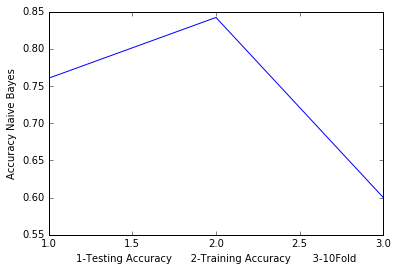

In [165]:
#PLOTTING THE ACCURACY FOR NAIVE BAYES 
%matplotlib inline
avgNBKF=.60
import matplotlib.pyplot as plt
#plt.plot([1,2,3,4])
plt.plot([1,2,3], [accuracy,accuracy123,avgNBKF])
plt.ylabel('Accuracy Naive Bayes')
plt.xlabel('1-Testing Accuracy      2-Training Accuracy       3-10Fold')
plt.show()

<h2>LOGISTIC REGRESSION</h2>
<p>-----------------------------------------------</p>

In [46]:



from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel
from pyspark.mllib.regression import LabeledPoint

model2 = LogisticRegressionWithLBFGS.train(training)




<pre>Logistic Regression is done in the above step with the training data obtained already.
</pre>

In [139]:
# TESTING ACCURACY FOR LR
#labelsAndPreds = test.map(lambda pq: (pq.label, model2.predict(pq.features)))
labelsAndPreds = test.map(lambda lp: (float(model2.predict(lp.features)), lp.label))
accuracy1 = 1.0 * labelsAndPreds.filter(lambda x1: x1[0] == x1[1]).count() / test.count()
print (accuracy1)

0.7270194986072424


<pre>
The TESTING accuracy is calculated for the LR
</pre>

In [140]:

#TRAINING ACCURACY FOR LR

from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel
from pyspark.mllib.regression import LabeledPoint




(trainingData, testData) = training.randomSplit([1, 0])
(testData,dummy)=training.randomSplit([.3, 0])


model23 = LogisticRegressionWithLBFGS.train(trainingData)
labelsAndPreds = testData.map(lambda lp: (float(model23.predict(lp.features)), lp.label))
accuracy12T = 1.0 * labelsAndPreds.filter(lambda x1: x1[0] == x1[1]).count() / testData.count()
print (accuracy12T)

0.88015


<pre>TRAINING ACCURACY FOR LR is calculated ABOVE</pre>

<pre>PRECISION RECALL AND F1 FOR LR is calculated BELOW</pre>

In [108]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.util import MLUtils

metrics = BinaryClassificationMetrics(labelsAndPreds)

print("Area under PR = %s" % metrics.areaUnderPR)

print("Area under ROC = %s" % metrics.areaUnderROC)


from pyspark.mllib.evaluation import MulticlassMetrics

# Instantiate metrics object
metrics = MulticlassMetrics(labelsAndPreds)

# Overall statistics
precision = metrics.precision()
recall = metrics.recall()
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)
print (metrics.confusionMatrix().toArray())

Area under PR = 0.8018254293506476
Area under ROC = 0.7260352641708572
Summary Stats
Precision = 0.7270194986072424
Recall = 0.7270194986072424
F1 Score = 0.7270194986072424
[[ 116.   61.]
 [  37.  145.]]


In [80]:
#K Fold for LR
num_folds = 10
subset_size = int(training.count()/num_folds)
trainingList1=training.collect()
#print (subset_size)
accuracyLRKF123=0
for i in range(num_folds):
    testing_Split = trainingList1[i*subset_size:][:subset_size]
    training_Split = trainingList1[:i*subset_size] + trainingList1[(i+1)*subset_size:]
    training_this_round = sc.parallelize(training_Split)   
    testing_this_round = sc.parallelize(testing_Split) 
    LogisticRegressionKF=LogisticRegressionWithLBFGS.train(training_this_round)
    labelsAndPreds1 = testing_this_round.map(lambda pq: (pq.label, LogisticRegressionKF.predict(pq.features)))
    accuracyLRKF = 1.0 * labelsAndPreds1.filter(lambda x1: x1[0] == x1[1]).count() / testing_this_round.count()
    print (accuracyLRKF)
    accuracyLRKF123+=accuracyLRKF
print(accuracyLRKF123/10)

0.634
0.625375
0.647875
0.658375
0.6495
0.6615
0.655125
0.651625
0.670125
0.662875
0.6516374999999999


<pre>
K Fold Validation is implemented for LR

0.634
0.625375
0.647875
0.658375
0.6495
0.6615
0.655125
0.651625
0.670125
0.662875
Avg: 0.6516374999999999
</pre>

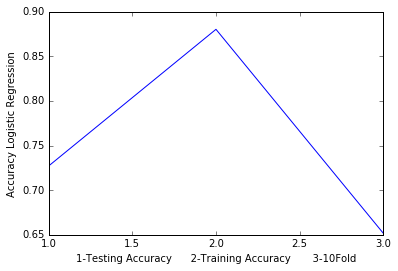

In [161]:
#LR GRAPH

%matplotlib inline
import matplotlib.pyplot as plt
#plt.plot([1,2,3,4])
plt.plot([1,2,3], [accuracy1,accuracy12T,(accuracyLRKF123/10)])

plt.ylabel('Accuracy Logistic Regression')
plt.xlabel('1-Testing Accuracy      2-Training Accuracy       3-10Fold')
plt.show()

<h1>DECISION TREE</h1>
<p>--------------------</p>

In [147]:
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.feature import IDF
from pyspark.mllib.regression import LabeledPoint

p1=sc.parallelize(polarity_list)   

j1=sc.parallelize(temp_test)   

    #print (i)
    #break
hashingTF1 = HashingTF(numFeatures=100)
tf1 = hashingTF1.transform(j1)
    #print (tf)
tf1.cache()
idf1 = IDF().fit(tf1)
tfidf1 = idf1.transform(tf1)
    
    #print (tfidf)

p_test1=sc.parallelize(polarity_list_test)   

j_test1=sc.parallelize(temp_test_test)   

    #print (i)
    #break
hashingTF_test1 = HashingTF(numFeatures=100)
tf_test1 = hashingTF_test1.transform(j_test1)
    #print (tf)
tf_test1.cache()
idf_test1 = IDF().fit(tf_test1)
tfidf_test1 = idf_test1.transform(tf_test1)
    


<pre>
The tfidf values for the Decision tree is calculated in the above step adding numFeatures to the HashingTF. This reduction helps to test it faster
</pre>

In [148]:
zipped1=p1.zip(tfidf1).collect()
z1=sc.parallelize(zipped1)
training1 = z1.map(lambda k1: LabeledPoint(k1[0], k1[1]))

zipped_test1=p_test1.zip(tfidf_test1).collect()
z_test1=sc.parallelize(zipped_test1)
test1 = z_test1.map(lambda l1: LabeledPoint(l1[0], l1[1]))

<pre>New training data is created after using the numFeatures for Decision Tree Model</pre>

In [149]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint

(trainingData, testData) = training1.randomSplit([0.3, 0.7])

model3 = DecisionTree.trainClassifier(trainingData, numClasses=2, categoricalFeaturesInfo={}, impurity='gini', maxDepth=5, maxBins=32)


<pre>The above code trains the Decision Tree Model with the Training Data.</pre>

In [153]:



# TEST ACCURACY
predictions = model3.predict(test1.map(lambda x: x.features))
labelsAndPredictionsAbc = test1.map(lambda lp: lp.label).zip(predictions)

accuracy2 = 1.0 * labelsAndPredictionsAbc.filter(lambda x12: x12[0] == x12[1]).count() / test1.count()

#print('Learned classification tree model:')
#print(model3.toDebugString())
print (accuracy2)

0.5738161559888579


<pre>TEST Accuracy for the Decision tree is calculate above</pre>

In [162]:
#TRAINING ACCURACY FOR DL
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint

(trainingData1, testData) = training1.randomSplit([1.0, 0])
(testData,dummy) = training1.randomSplit([.3, 0])

model33 = DecisionTree.trainClassifier(trainingData1, numClasses=2, categoricalFeaturesInfo={}, impurity='gini', maxDepth=5, maxBins=32)
predictions = model33.predict(testData.map(lambda x: x.features))
labelsAndPredictionsAbc = testData.map(lambda lp: lp.label).zip(predictions)

accuracy2345 = 1.0 * labelsAndPredictionsAbc.filter(lambda x12: x12[0] == x12[1]).count() / testData.count()

#print('Learned classification tree model:')
#print(model3.toDebugString())
print (accuracy2345)

0.5954875


</pre>TRAINING ACCURACY FOR DL IS CALUCLATED ABOVE</pre>

In [107]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.util import MLUtils

metrics = BinaryClassificationMetrics(labelsAndPredictionsAbc)

print("Area under PR = %s" % metrics.areaUnderPR)

print("Area under ROC = %s" % metrics.areaUnderROC)


from pyspark.mllib.evaluation import MulticlassMetrics

# Instantiate metrics object
metrics = MulticlassMetrics(labelsAndPredictionsAbc)

# Overall statistics
precision = metrics.precision()
recall = metrics.recall()
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)
print (metrics.confusionMatrix().toArray())

Area under PR = 0.5878412189723804
Area under ROC = 0.6068246614397719
Summary Stats
Precision = 0.5905292479108635
Recall = 0.5905292479108635
F1 Score = 0.5905292479108635
[[ 137.  107.]
 [  40.   75.]]


<pre>Precision, Recall and F1 for DL is calculated ABOVE</pre>

In [156]:
#K Fold for LR
num_folds = 10
subset_size = int(training1.count()/num_folds)
trainingList1=training1.collect()
#print (subset_size)
accuracyDTKF123=0
for i in range(num_folds):
    testing_Split = trainingList1[i*subset_size:][:subset_size]
    training_Split = trainingList1[:i*subset_size] + trainingList1[(i+1)*subset_size:]
    training_this_round = sc.parallelize(training_Split)   
    testing_this_round = sc.parallelize(testing_Split) 
    
    model3 = DecisionTree.trainClassifier(testing_this_round, numClasses=2, categoricalFeaturesInfo={}, impurity='gini', maxDepth=5, maxBins=32)
    predictions = model33.predict(testing_this_round.map(lambda x: x.features))
    labelsAndPredictionsAbc = testing_this_round.map(lambda lp: lp.label).zip(predictions)

    accuracyDTKF = 1.0 * labelsAndPredictionsAbc.filter(lambda x12: x12[0] == x12[1]).count() / testing_this_round.count()
    print (accuracyDTKF)
    accuracyDTKF123+=accuracyDTKF
print(accuracyDTKF123/10)

0.678625
0.658625
0.666
0.659875
0.6765
0.526625
0.525875
0.514625
0.53175
0.516375
0.5954875


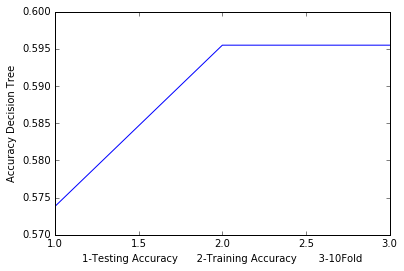

In [164]:
#DL GRAPH
%matplotlib inline
import matplotlib.pyplot as plt
#plt.plot([1,2,3,4])
plt.plot([1,2,3], [accuracy2,accuracy2345,(accuracyDTKF123/10)])

plt.ylabel('Accuracy Decision Tree')
plt.xlabel('1-Testing Accuracy      2-Training Accuracy       3-10Fold')
plt.show()

In [171]:
print(accuracyDTKF123/10)

0.5954875


<h1> Q5. GRAPH of NB, TR, DT with Accuracies</h1>

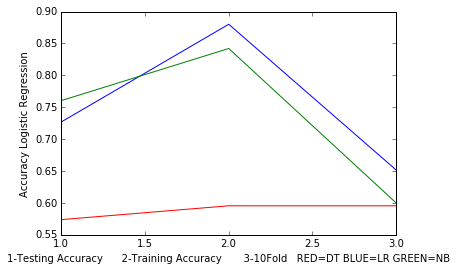

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.plot([1,2,3,4])
plt.plot([1,2,3], [accuracy1,accuracy12T,(accuracyLRKF123/10)])
plt.plot([1,2,3], [accuracy,accuracy123,avgNBKF])
plt.plot([1,2,3], [accuracy2,accuracy2345,(accuracyDTKF123/10)])
plt.ylabel('Accuracy Logistic Regression')
plt.xlabel('1-Testing Accuracy      2-Training Accuracy       3-10Fold   RED=DT BLUE=LR GREEN=NB')

plt.show()